In [1]:
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
from celluloid import Camera
import ffmpeg

In [ ]:
from IPython.display import display

In [2]:
def simulate(horizon):
    '''
    horizon in hours
    '''
    np.random.seed(0)
    
    if horizon:
        h_i = 1                      #initial level of container
        t_i = 0                      #intial time
        horizon = horizon * 60       #horizon time in minutes
        
        
        del_t_min = 30                  #minimum time interval between two consecutive del_h (= 30 mins)
        del_t_max = 60*2.5              #maximum time interval between two consecutive del_h (= 2.5 hours)
                
        times = [t_i]
        h = [h_i]
        del_hs = []
        del_ts = []
        
        while (h[-1] >= 0) & (times[-1] <= horizon) :
            del_t = np.random.randint(del_t_min, del_t_max)
            del_ts.append(del_t)
            del_h = 0.1*np.random.uniform()
            del_hs.append(del_h)
            
            if (times[-1] + del_t <= horizon) & (h[-1] - del_h >= 0):
                
                times.append(times[-1] + del_t)
                h.append(h[-1] - del_h )
            
            else: break
                        
        h = np.array(h)*100
        times = np.array(times) / 60
        del_hs = np.array(del_hs)*100
        del_ts = np.array(del_ts) / 60
        h = np.round(h, 2); times = np.round(times, 2); del_hs = np.round(del_hs, 2); del_ts = np.round(del_ts, 2)
        
        return h, times, del_hs, del_ts

In [ ]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,1,1)

plt.style.use('seaborn-pastel')
ax.set_xlabel('time')
ax.set_ylabel('level')
plt.ylim([0,1.1])
timeticks = [x for x in range(25)]
ticks = ax.set_xticks(timeticks)
plt.xlim([-1, timeticks[-1]+1])
line, = plt.plot([], [], axes=ax, lw=3)

def init():
    line.set_data([], [])
    return line,

y = []; x = [] 
def animate(j):
    h, t, d = simulate(24)
    t = t /60
    
    
#     x = h; y = []
    y.append(h[j])
    x.append(t[j])
    
    
#     ax.clear()
#     if len(x) >=2:
#         plt.plot(x=[x[-1], x[-2]], y=[y[-1], y[-2]], axes=ax, color='red')
#     ax.scatter(x,y)
#     ax.set_xlabel('time')
#     ax.set_ylabel('level')
#     plt.ylim([0,1.1])
    
#     timeticks = [x for x in range(25)]
#     ticks = ax.set_xticks(timeticks)
#     plt.xlim([-1, timeticks[-1]+1])
    
    line.set_data(x, y)
    return line,
    
# ani = animation.FuncAnimation(fig, animate, interval=1000)
anim = animation.FuncAnimation(fig, animate, init_func=init, interval=1000, blit=True)
ani.save('shariqanime.html', writer='html')

### plot graph

In [111]:
def plot_graph(sim_fn, horizon):
    h, t, d = sim_fn(horizon)

    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(1,1,1)
    plt.style.use('seaborn')
    
    camera = Camera(fig)
    
    ax.set_xlabel('time')
    ax.set_ylabel('level')
    plt.ylim([0,1.1])
    timeticks = [x for x in range(25)]
    ticks = ax.set_xticks(timeticks)
    plt.xlim([-1, timeticks[-1]+1])
    ax.get_xaxis().set_visible(False)
    
    x = t
    y = h
    
    for i in range(len(h)):
        ax.scatter(x[:i], y[:i], color='darkblue')
        ax.plot(x[:i], y[:i], color='blue')
        camera.snap()
        
    animation = camera.animate(interval = 1000, repeat = False)
    animation.save('shariqanime.html', writer='html')
    return animation

In [ ]:
plot_graph(simulate, 24)

### rectangle

In [3]:
horizon = 24
h, t, dh, dt = simulate(horizon)
print(len(h), len(t), len(dh), len(dt))

17 17 17 17


In [140]:
h

array([100.  ,  94.07,  88.04,  79.57,  73.11,  70.14,  60.5 ,  55.72,
        50.43,  46.51,  45.8 ,  39.31,  30.99,  22.29,  17.55,  12.94,
         6.15])

In [133]:
t

array([ 0.  ,  1.23,  2.8 ,  4.42,  6.3 ,  7.4 ,  9.37, 10.83, 11.98,
       13.95, 14.87, 15.52, 17.35, 19.17, 21.03, 22.35, 23.17])

In [134]:
dh

array([0.06, 0.06, 0.08, 0.06, 0.03, 0.1 , 0.05, 0.05, 0.04, 0.01, 0.06,
       0.08, 0.09, 0.05, 0.05, 0.07, 0.06])

In [135]:
dt

array([1.23, 1.57, 1.62, 1.88, 1.1 , 1.97, 1.47, 1.15, 1.97, 0.92, 0.65,
       1.83, 1.82, 1.87, 1.32, 0.82, 1.15])

In [145]:
def plot_rect(sim_fn=simulate, horizon=24):  
    h, t, dh, dt = sim_fn(horizon)
    
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(1,1,1)
    
    camera = Camera(fig)
    
    # ax.set_xlabel('time')
    ax.set_ylabel('level in %')
    plt.ylim([0,105])
    # timeticks = [x for x in range(25)]
    # ticks = ax.set_xticks(timeticks)
    plt.xlim([-1, 10+1])
    ax.get_xaxis().set_visible(False)
    
    x = t
    y = h

    from matplotlib.patches import Rectangle
    width = 2
    
    for i in range(len(h)):
        ax.hlines(y = y[i], xmin=-1, xmax=width*(1.2), colors='k', linestyles='dashed', label='shariq', lw=1)
        ax.annotate(text = f'level = {y[i]}%, time = {x[i]} hours , del_h = {dh[i]}%, del_t = {dt[i]} hours', 
                    xy=(width*(1.2), y[i]))
        rect = Rectangle((0,0), width, y[i], fill=True)
        ax.add_patch(rect)
        
        camera.snap()
        
    animation = camera.animate(interval = 1000, repeat = False)
    animation.save('rectangle.html', writer='html')
    return animation

<IPython.core.display.Javascript object>


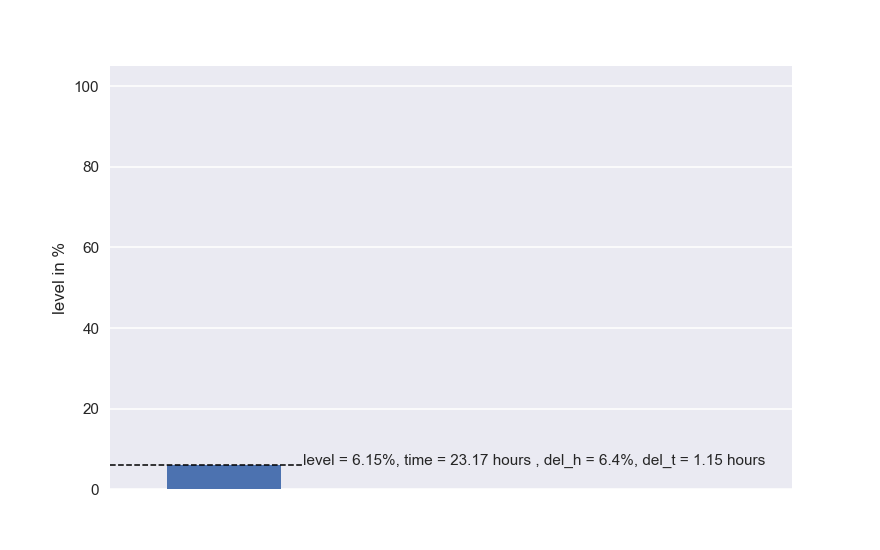

In [146]:
plot_rect(simulate, 24)

In [ ]:
fig, ax = plt.subplots()

from matplotlib.patches import Rectangle

rect = Rectangle((0.1,0.1), 0.4, 0.3, fill=False)

ax.add_patch(rect)

# FORECASTING

### 1. Simple MA

In [ ]:
def simple_ma(x, win):
    y_pred = np.zeros(x.shape[0])
    y_pred[:win] = np.nan
    
    for t in range(win-1, x.shape[0]):
        sum = 0
        for j in range(0,win):
            sum = sum + y[t-j]
        avg = sum / win
        y_pred[t] = avg
    return y_pred

### 2. EWMA

In [ ]:
def ewma(x, alpha):
    y_pred = []
    y_pred.append(x[0]) # y_pred[0] = x[0]
    
    for t in range(1, len(x)):
        pred = (1 - alpha)*y[t-1] + alpha*x[t]
        y_pred.append(pred)
    return np.array(y_pred)

### 3. Linear Regression

In [3]:
class Lin_reg():
    
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.m = 0
        self.c = 0
        self.y_pred = np.array([])
        self.pred = np.array([])
    
    def train(self):
        #Set an objective function
        def objective(x):
            y_pred = x[0] + x[1]*self.X  #equation of regression line
            error = y_pred - self.y      #error varibale
            return np.sum(error**2)      #Sum of squares of errors
            
        #Perfrom optimization:
        #Minimization of the objective function    
        from scipy.optimize import minimize
            
        x0 = np.array([0.0, 0.0])        #Initialize coefficients to zeroes
        result = minimize(objective, x0) #Perform minimization
        coefficients = result.x
        
        m = coefficients[1]
        c = coefficients[0]
        
        y_pred = m*self.X + c
        
        self.m = m
        self.c = c
        self.y_pred = y_pred
        
    def predict(self, x):
        pred = self.m*x + self.c
        self.pred = pred
        return pred

In [24]:
class Cubic_reg():
    
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.a = 0
        self.b = 0
        self.c = 0
        self.d = 0
        self.y_pred = np.array([])
        self.pred = np.array([])
    
    def train(self):
        #Set an objective function
        def objective(x):
            y_pred = x[0] + x[1]*self.X +x[2]*pow(self.X, 2) + x[3]*pow(self.X, 3) #equation of regression line
            error = y_pred - self.y                          #error varibale
            return np.sum(error**2)                          #Sum of squares of errors
            
        #Perfrom optimization:
        #Minimization of the objective function    
        from scipy.optimize import minimize
            
        x0 = np.array([0.0, 0.0, 0.0, 0.0])      #Initialize coefficients to zeroes
        result = minimize(objective, x0)    #Perform minimization
        coefficients = result.x
        
        a = coefficients[0]
        b = coefficients[1]
        c = coefficients[2]
        d = coefficients[3]
        
        y_pred = a + b*self.X + c*pow(self.X, 2) + d*pow(self.X, 3) 
        
        self.a = a
        self.b = b
        self.c = c
        self.d = d
        self.y_pred = y_pred
        
    def predict(self, x):
        pred = self.a + self.b*x + self.c*pow(x, 2) + self.d*pow(x, 3)
#         pred = self.a*pow(x,2) + self.b*x + self.c
        self.pred = pred
        return pred

### Data

In [4]:
horizon = 24
h, t, dh, dt = simulate(horizon)

In [31]:
h

array([100.  ,  94.07,  88.04,  79.57,  73.11,  70.14,  60.5 ,  55.72,
        50.43,  46.51,  45.8 ,  39.31,  30.99,  22.29,  17.55,  12.94,
         6.15])

### PREDICTION

In [ ]:
x = t[:4]
y_true = h[:4]
horizon = 24.0
x_line = np.array([x[-1]+0.5*i for i in range(1, int(np.ceil(horizon-x[-1])*2))])
x = np.hstack([x, x_line])
x

In [ ]:
y_true

In [18]:
#LINEAR REGRESSION
#First predict time intervals, t
M = 4
yt = t[:M]
xt = np.linspace(0,M-1,M)
lr = Lin_reg(xt, yt)
lr.train()

#create extrapolated x-points (here values on xl will be time values)
xl = yt.copy()
i = M
while xl[-1] < horizon:
    p = lr.predict(np.array([i]))
    xl = np.hstack([xl, p])
    i += 1
xl = xl[xl <= horizon]
print(xl, len(xl))
xl_extra = np.hstack([xl, lr.predict(np.array([i]))])

#Predict h-values using above predicted t-values (i.e. xl)
yh = h[:M]
xh = t[:M]

lr = Lin_reg(xh, yh)
lr.train()
yl = lr.predict(xl)
print(yl, len(yl))

n = sum(yl >= 0)
lr_preds = yl[:n]
xl = xl[:n]

yl_extra = yl[:n+1]
print('n = ', n, '\n')
print('xl\n', xl, len(xl))
print('lr_preds\n', lr_preds, len(lr_preds))
print('xl_extra\n', xl_extra, len(xl_extra))
print('yl_extra\n', yl_extra, len(yl_extra))

[ 0.          1.23        2.8         4.42        5.81999984  7.30299979
  8.78599974 10.26899969 11.75199964 13.23499959 14.71799954 16.20099948
 17.68399943 19.16699938 20.64999933 22.13299928 23.61599923] 17
[100.01379581  94.42782239  87.29775875  79.94062302  73.5826052
  66.84764723  60.11268927  53.3777313   46.64277333  39.90781537
  33.1728574   26.43789944  19.70294147  12.9679835    6.23302554
  -0.50193243  -7.23689039] 17
n =  15 

xl
 [ 0.          1.23        2.8         4.42        5.81999984  7.30299979
  8.78599974 10.26899969 11.75199964 13.23499959 14.71799954 16.20099948
 17.68399943 19.16699938 20.64999933] 15
lr_preds
 [100.01379581  94.42782239  87.29775875  79.94062302  73.5826052
  66.84764723  60.11268927  53.3777313   46.64277333  39.90781537
  33.1728574   26.43789944  19.70294147  12.9679835    6.23302554] 15
xl_extra
 [ 0.          1.23        2.8         4.42        5.81999984  7.30299979
  8.78599974 10.26899969 11.75199964 13.23499959 14.71799954 16.20

In [30]:
#QUADRATIC REGRESSION
#First predict time intervals, t
M = 4
yt = t[:M]
xt = np.linspace(0,M-1,M)
qr = Cubic_reg(xt, yt)
qr.train()

#create extrapolated x-points (here values on xl will be time values)
xq = yt.copy()
i = M
while xq[-1] < horizon:
    p = qr.predict(np.array([i]))
    xq = np.hstack([xq, p])
    i += 1
xq1 = xq
xq = xq[xq <= horizon]
print('xq',xq)

#Predict h-values using above predicted t-values (i.e. xl)
yh = h[:M]
xh = t[:M]

qr = Cubic_reg(xh, yh)
qr.train()
yq = qr.predict(xq)
print('yq',yq)

y_min = sum(yq >= 0)
x_min = sum(xq >= 0)
n = min(x_min, y_min)
qr_preds = yq[:n]
xq = xq[:n]
print('xq_trunc\n', xq)
print('qr_preds\n', qr_preds)

xq [ 0.00000000e+00  1.23000000e+00  2.80000000e+00 ... -1.02751812e+08
 -1.02991735e+08 -1.03232031e+08]
yq [1.00000002e+02 9.40699938e+01 8.80400058e+01 ... 1.92704320e+23
 1.94057353e+23 1.95418825e+23]
xq_trunc
 [0.         1.23       2.8        4.42       5.79999487 6.64998396
 6.67996458 5.59993439 3.11989107]
qr_preds
 [100.00000232  94.06999385  88.04000584  79.56999796  67.19319808
  55.91038053  55.45088993  69.39920447  86.68801813]


### Neural network: 1 Hidden layer, 4 nodes

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [71]:
in_dim, out_dim = 1, 1

model = Sequential()
model.add(Dense(1, input_dim=in_dim, activation="relu"))
# model.add(Dense(4, input_dim=in_dim, activation="relu"))
# model.add(Dense(32, activation="relu"))
model.add(Dense(out_dim))
model.compile(loss="mse", optimizer="adam")
 
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [148]:
horizon2 = 24*365
h, t, dh, dt = simulate(horizon2)
print(len(h), len(t))

5863 5863


In [150]:
M = int(24*30)
yt = t[:M]
xt = np.linspace(0,M-1,M)
X_train = np.array(xt)
y_train = np.array(yt)

model = Sequential()
model.add(Dense(4, input_dim=in_dim, activation="relu"))
model.add(Dense(out_dim))
model.compile(loss="mse", optimizer="adam")
 
model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=0)
print('xt',xt)
print('yt',yt)
nn_preds = model.predict(np.array(xt))

xt [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 19

<IPython.core.display.Javascript object>


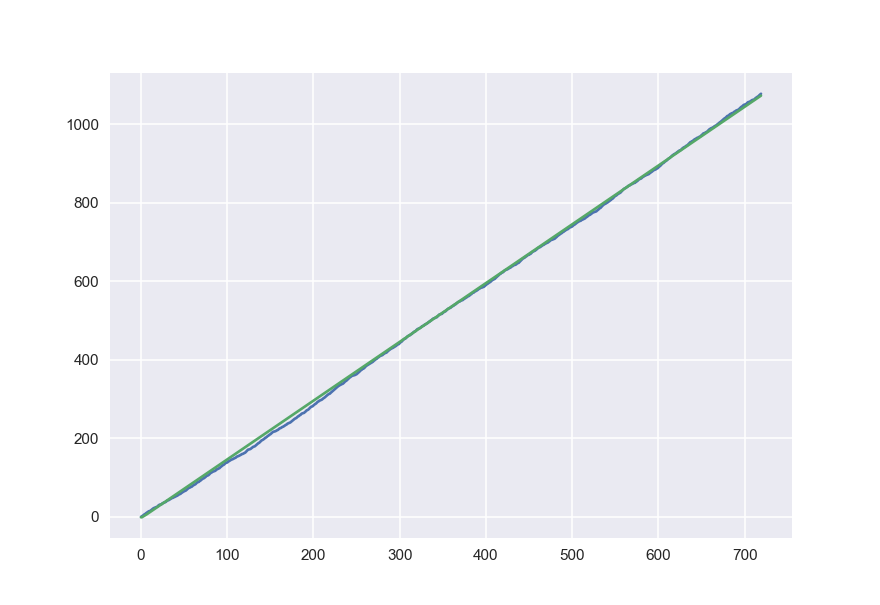

In [151]:
fig, ax= plt.subplots(1)
ax.plot(xt, yt)
ax.plot(xt, nn_preds)

In [66]:
horizon3months = 24*30*3
yt = t[:M]
xt = np.linspace(0,M-1,M)
X_train = xt
y_train = yt

model.fit(X_train, y_train, epochs=1, batch_size=1, verbose=0)

xn = yt.copy()
print('xn', xn)
i = M
while (xn[-1] < horizon) & (xn[-1] >= 0):
    p = model.predict(np.array([i]))
    xn = np.hstack([xn, p[0]])
    i += 1
# xn = xn[xn <= horizon]
print('xn',xn)

#Predict h-values using above predicted t-values (i.e. xl)
yh = h[:M]
xh = t[:M]

model.fit(xh, yh, epochs=1, batch_size=1, verbose=0)
yn = qr.predict(xn)
print('yn', yn)

y_min = sum(yn >= 0)
x_min = sum(xn >= 0)
n = min(x_min, y_min)
qr_preds = yn[:n]
xn = xn[:n]
print('xn_trunc\n', xn)
print('qr_preds\n', qr_preds)

xn [0.   1.23 2.8  4.42]
xn [ 0.00000000e+00  1.23000000e+00  2.80000000e+00  4.42000000e+00
  1.85085654e-01  1.79337636e-01  1.79337636e-01  1.79337636e-01
  1.79337636e-01  1.79337636e-01  1.79337636e-01  1.79337636e-01
  1.79337636e-01  1.79337636e-01  1.79337636e-01  1.79337636e-01
  1.79337636e-01  1.79337636e-01  1.79337636e-01  1.79337636e-01
  1.79337636e-01  1.79337636e-01  1.79337636e-01  1.79337636e-01
  1.79337636e-01  1.79337636e-01  1.79337636e-01  1.79337636e-01
  1.79337636e-01  1.79337636e-01  1.79337636e-01  1.79337636e-01
  1.79337636e-01  1.79337636e-01  1.79337636e-01  1.79337636e-01
  1.79337636e-01  1.79337636e-01  1.79337636e-01  1.79337636e-01
  1.79337636e-01  1.79337636e-01  1.79337636e-01  1.79337636e-01
  1.79337636e-01  1.79337636e-01  1.79337636e-01  1.79337636e-01
  1.79337636e-01  1.79337636e-01  1.79337636e-01  1.79246217e-01
  1.76752806e-01  1.74257755e-01  1.71762690e-01  1.69269294e-01
  1.66773826e-01  1.64279178e-01  1.61784127e-01  1.59289896e-

In [ ]:

lr = Lin_reg(x[:4],y_true)
lr.train()
lr_preds = lr.predict(x)
# print(len(lr_preds), len(x))
n =sum(lr_preds >=0)
lr_preds = lr_preds[:n]
x = x[:n]
lr_preds

In [ ]:
fig = plt.Figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)

ax.plot(t, h )
ax.scatter(t, h, label='true')
ax.plot(xl, lr_preds)
ax.scatter(xl, lr_preds, label='lr')
ax.legend(loc='best')
display(fig)

In [ ]:
fig = plt.Figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)

ax.plot(x[:4], y )
ax.scatter(x[:4], y , label='true')
ax.plot(x[:4], pred_lr)
ax.scatter(x[:4], pred_lr, label='lr')
ax.legend(loc='best')
plt.show()
display(fig)

In [11]:
h

array([100.  ,  94.07,  88.04,  79.57,  73.11,  70.14,  60.5 ,  55.72,
        50.43,  46.51,  45.8 ,  39.31,  30.99,  22.29,  17.55,  12.94,
         6.15])

In [44]:
t

array([ 0.  ,  1.23,  2.8 ,  4.42,  6.3 ,  7.4 ,  9.37, 10.83, 11.98,
       13.95, 14.87, 15.52, 17.35, 19.17, 21.03, 22.35, 23.17])

In [6]:
def plot2graph(x1, y1, x2, y2, l1, l2, horizon):
    n1 = len(x1)
    n2 = len(x2)

    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(1,1,1)
    plt.style.use('seaborn')
    
    camera = Camera(fig)
    ax.set_title(f'Plot of True inventory level and forecast using first 4 values, for horizon of {horizon} hours')
    ax.set_xlabel('Time in hours')
    ax.set_ylabel('Inventor level in %')
    plt.ylim([0,105])
#     timeticks = [x for x in range(int(np.ceil(x1[-1])))]
#     timeticks = timeticks + [timeticks[-1]+1]
    timeticks = [i for i in range(horizon+1)]
    ticks = ax.set_xticks(timeticks)
#     plt.xlim([-1, timeticks[-1]])
#     ax.get_xaxis().set_visible(False)
    
    max_n = max(n1, n2)
    min_n = min(n1, n2)
    
    for i in range(max_n+1):
#         if ax is None:
#             ax = plt.gca()
#             ax.get_legend()
        if n1 == max_n:
            ax.scatter(x1[:i], y1[:i], color='blue', label=l1)
            ax.plot(x1[:i], y1[:i], color='blue')
            ax.text(s = f'- {l1}', x=x1[-5], y=95, color='blue', fontsize=12, backgroundcolor='white')
            if i <= min_n:
                ax.scatter(x2[:i], y2[:i], color='grey', label=l2)
                ax.plot(x2[:i], y2[:i], color='grey')
                ax.text(s=f'- {l2}', x=x1[-5], y=90, color='grey', fontsize=12, backgroundcolor='white')
            else:
                ax.scatter(x2, y2, color='grey', label=l2)
                ax.plot(x2, y2, color='grey')
                ax.text(s=f'- {l2}', x=x1[-5], y=90, color='grey', fontsize=12, backgroundcolor='white')
            camera.snap()
            
        elif n2 == max_n:
            ax.scatter(x2[:i], y2[:i], color='blue', label=l2)
            ax.plot(x2[:i], y2[:i], color='blue')
            ax.text(s= f'- {l2}', x=x1[-5], y=95, color='blue', fontsize=12, backgroundcolor='white')
            if i <= min_n:
                ax.scatter(x1[:i], y1[:i], color='grey', label=l1)
                ax.plot(x1[:i], y1[:i], color='grey')
                ax.text(s=f'- {l1}', x=x1[-5], y=90, color='grey', fontsize=12, backgroundcolor='white')
            else:
                ax.scatter(x1, y1, color='grey', label=l1)
                ax.plot(x1, y1, color='grey')
                ax.text(s=f'- {l1}', x=x1[-5], y=90, color='grey', fontsize=12, backgroundcolor='white')
            
            camera.snap()
                    
            
    anim = camera.animate(interval = 1000, repeat = False)
    anim.save('shariqanime.html', writer='html')
    return anim

<IPython.core.display.Javascript object>


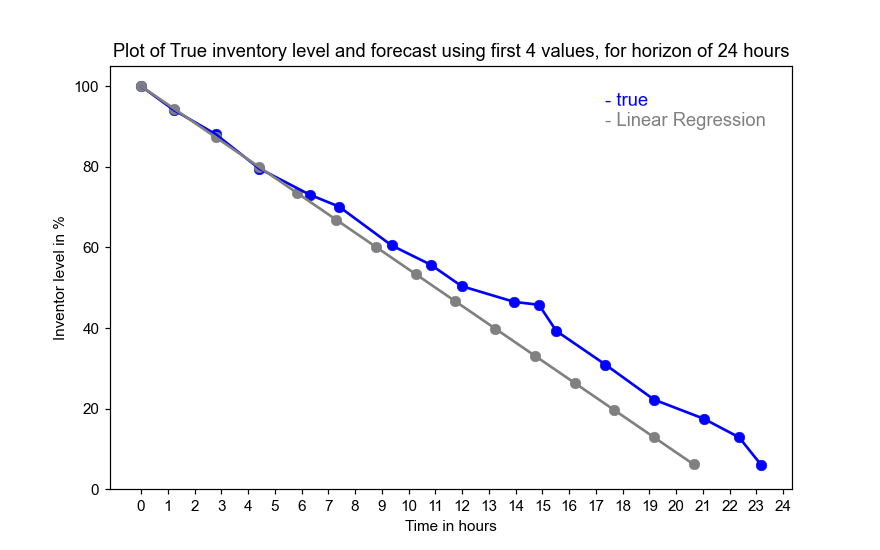

In [7]:
x1 = t
y1 = h
x2 = xl
y2 = lr_preds
horizon = 24
plot2graph(x1,y1,x2,y2, 'true', 'Linear Regression', horizon)

In [15]:
pd.DataFrame({'t':t, 'h':h, 'dh':dh, 'dt':dt})

,t,h,dh,dt
0,0.00,100.00,5.93,1.23
1,1.23,94.07,6.03,1.57
2,2.80,88.04,8.47,1.62
3,4.42,79.57,6.46,1.88
4,6.30,73.11,2.98,1.10
5,7.40,70.14,9.64,1.97
6,9.37,60.50,4.78,1.47
7,10.83,55.72,5.29,1.15
8,11.98,50.43,3.93,1.97
9,13.95,46.51,0.71,0.92


In [27]:
dflr = pd.DataFrame({'t_lr':xl, 'h_lr':lr_preds})
dflr

,t_lr,h_lr
0,0.000000,100.013796
1,1.230000,94.427822
2,2.800000,87.297759
3,4.420000,79.940623
4,5.820000,73.582605
5,7.303000,66.847647
6,8.786000,60.112689
7,10.269000,53.377731
8,11.752000,46.642773
9,13.235000,39.907815


In [34]:
xle_df = pd.DataFrame({'t_lr_extra':xl_extra})
xle_df['dt_lr'] = xle_df.t_lr_extra.diff()
xle_df['dt_lr'] = np.hstack([xle_df.dt_lr[1:], np.array([np.nan])])

yle_df = pd.DataFrame({'h_lr_extra':yl_extra})
yle_df['dh_lr'] = yle_df.h_lr_extra.diff()
yle_df['dh_lr'] = np.hstack([yle_df.dh_lr[1:], np.array([np.nan])])

In [35]:
display(xle_df)
display(yle_df)

,t_lr_extra,dt_lr
0,0.000000,1.230
1,1.230000,1.570
2,2.800000,1.620
3,4.420000,1.400
4,5.820000,1.483
5,7.303000,1.483
6,8.786000,1.483
7,10.269000,1.483
8,11.752000,1.483
9,13.235000,1.483


,h_lr_extra,dh_lr
0,100.013796,-5.585973
1,94.427822,-7.130064
2,87.297759,-7.357136
3,79.940623,-6.358018
4,73.582605,-6.734958
5,66.847647,-6.734958
6,60.112689,-6.734958
7,53.377731,-6.734958
8,46.642773,-6.734958
9,39.907815,-6.734958


<IPython.core.display.Javascript object>


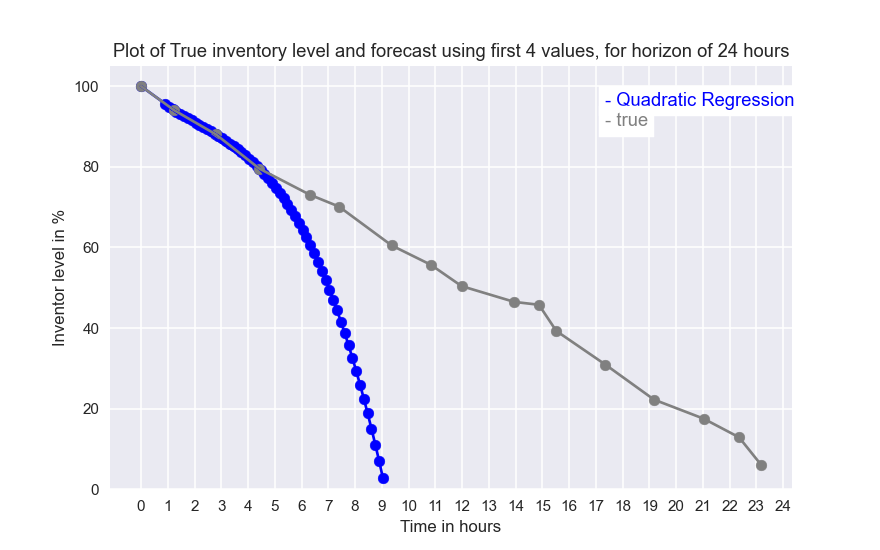

In [52]:
x1 = t
y1 = h
x2 = xn
y2 = qr_preds
horizon = 24
plot2graph(x1,y1,x2,y2, 'true', 'Quadratic Regression', horizon)

In [40]:
import subprocess

cmd = 'ffmpeg -codecs'
x = subprocess.check_output(cmd, shell=True)
x = x.split(b'\n')
for e in x:
    print(e)

In [41]:
inputloc = r"C:\Users\Shariq\shariqanime_frames\frame%07d.png"
outputloc = r"C:\Users\Shariq\out.webm"

frame_rate = 1
cmd = f'ffmpeg -framerate {frame_rate} -start_number 0000000 -i "{inputloc}" "{outputloc}"'
print(cmd)
subprocess.check_output(cmd, shell=True)

ffmpeg -framerate 1 -start_number 0000000 -i "C:\Users\Shariq\shariqanime_frames\frame%07d.png" "C:\Users\Shariq\out.webm"


b''

### rectangle ffmpeg

In [147]:
inputloc = r"C:\Users\Shariq\rectangle_frames\frame%07d.png"
outputloc = r"C:\Users\Shariq\out_cylinder.webm"

frame_rate = 1
cmd = f'ffmpeg -framerate {frame_rate} -start_number 0000000 -i "{inputloc}" "{outputloc}"'
print(cmd)
subprocess.check_output(cmd, shell=True)

ffmpeg -framerate 1 -start_number 0000000 -i "C:\Users\Shariq\rectangle_frames\frame%07d.png" "C:\Users\Shariq\out_cylinder.webm"


b''

### plot with 2 axes

In [94]:
help(plt.subplots)

Help on function subplots in module matplotlib.pyplot:

subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
    Create a figure and a set of subplots.
    
    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.
    
    Parameters
    ----------
    nrows, ncols : int, default: 1
        Number of rows/columns of the subplot grid.
    
    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (*sharex*) or y (*sharey*)
        axes:
    
        - True or 'all': x- or y-axis will be shared among all subplots.
        - False or 'none': each subplot x- or y-axis will be independent.
        - 'row': each subplot row will share an x- or y-axis.
        - 'col': each subplot column will share an x- or y-axis.
    
        When subplots have a shared x-axis along a column, on

### ewma forecasting

In [155]:
def ewma(y, alpha):
    y_pred = []
    y_pred.append(y[0])
    
    for t in range(1, len(y)):
        pred = (1 - alpha)*y[t-1] + alpha*y[t]
        y_pred.append(pred)
    return np.array(y_pred)

alpha = 0.5

horizon = 24
h, t, dh, dt = simulate(horizon)

#First predict time intervals, t
M = 4
yt = t[:M]
xt = np.linspace(0,M-1,M)

#create extrapolated x-points (here values on xl will be time values)
# xl = yt.copy()
xl = ewma(yt, aplha)
i = M
while xl[-1] < horizon:
    xl = ewma(xl, alpha)
    p = xl[-1]
    xl = np.hstack([xl, p])
    i += 1
xl = xl[xl <= horizon]
print('xl', xl)

#Predict h-values #using above predicted t-values (i.e. xl)
yh = h[:M]
ye = ewma(yh, alpha)
# xh = t[:M]
i = M
while ye[-1] >0:
    ye = ewma(ye, alpha)
    p = ye[-1]
    ye = np.hstack([ye, p])
    i += 1
print('ye', ye)

n = sum(ye >= 0)
ew_preds = ye[:n]
xl = xl[:n]
print('xl_trunc\n', xl)
print('ew_preds\n', ew_preds)

KeyboardInterrupt: 